<a href="https://colab.research.google.com/github/bezreal/AnaliseDeDados-2024.2/blob/main/imdbmovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [40]:
import pandas as pd #Útil para a criação de Dataframe a partir de dados tabulares
import matplotlib.pyplot as plt #Útil para realizar visualizações de conjuntos de dados
import seaborn #Usada para visualização de dados estatísticos
import numpy #Biblioteca para computação numérica em Python

# Criando o Dataframe a partir do Dataset escolhido

In [41]:
arquivo = pd.read_csv('/content/imdb_top_1000.csv') #Guardando o dataset na váriavel 'arquivo'
dataframe = pd.DataFrame(arquivo) #Criando um dataframe utilizando o dataset guardado na váriavel 'arquivo'

# Manipulando o Dataframe

A coluna 'Gross' possui a vírgula como separador das casas de milhar.

In [42]:
dataframe["Gross"] = dataframe["Gross"].str.replace(",", "").astype(float)


A coluna 'Runtime' precisa de uma conversão apropriada para os inteiros.

In [43]:
dataframe["Runtime"] = dataframe["Runtime"].str.replace(" min", "").astype(int)

Há algumas colunas que precisam ser transformadas em números, removendo caracteres que impeçam a conversão.

In [44]:
dataframe["Released_Year"] = dataframe["Released_Year"].str.extract(r'(\d+[.\d]*)').astype('Int64')

# Realizando uma análise exploratória inicial

In [45]:
dataframe.head() #Checando os valores iniciais das 5 primeiras linhas

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [46]:
dataframe.info() #Quantidade de linhas e colunas, nome das colunas e valores não-nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    Int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: Int64(1), float64(3), int64(2), object(10)
memory usage: 126.1+ KB


In [47]:
dataframe.describe() #Informação descritiva dos dados númericos

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.0,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1991.217217,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,23.297025,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1920.0,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.0,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.0,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.0,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020.0,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [48]:
matriz_correlacao = dataframe.corr(numeric_only=True)
print(matriz_correlacao) #Calcula a matriz de correlação para as colunas numéricas do DataFrame

               Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
Released_Year       1.000000  0.165807    -0.131053   -0.339272     0.241785   
Runtime             0.165807  1.000000     0.243096   -0.031452     0.173264   
IMDB_Rating        -0.131053  0.243096     1.000000    0.268531     0.494979   
Meta_score         -0.339272 -0.031452     0.268531    1.000000    -0.018507   
No_of_Votes         0.241785  0.173264     0.494979   -0.018507     1.000000   
Gross               0.233250  0.139671     0.095923   -0.030587     0.574393   

                  Gross  
Released_Year  0.233250  
Runtime        0.139671  
IMDB_Rating    0.095923  
Meta_score    -0.030587  
No_of_Votes    0.574393  
Gross          1.000000  


# Gerando as visualizações

**Gráfico**: **Relação entre IMDB Rating e Receita Bruta**

Text(0, 0.5, 'Receita Bruta (USD)')

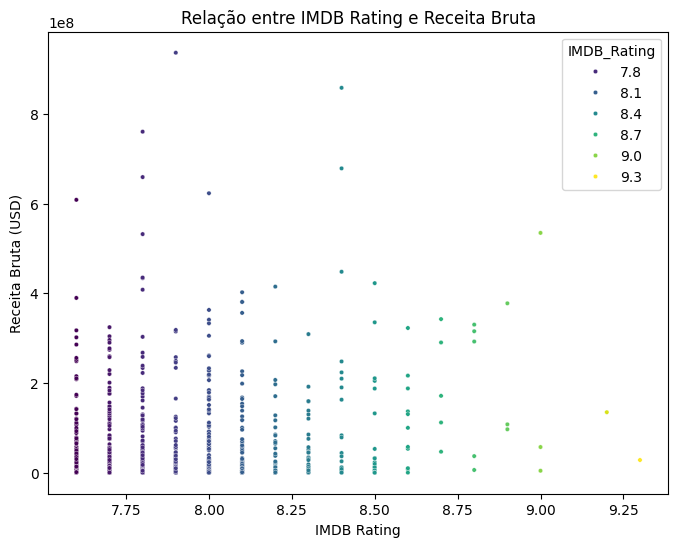

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
seaborn.scatterplot(x=dataframe["IMDB_Rating"], y=dataframe["Gross"], hue = dataframe["IMDB_Rating"], palette="viridis", s=10, ax=ax)
ax.set_title("Relação entre IMDB Rating e Receita Bruta")
ax.set_xlabel("IMDB Rating")
ax.set_ylabel("Receita Bruta (USD)")

**Gráfico**: **Tempo de Execução**

Text(0, 0.5, 'Quantidade de filmes')

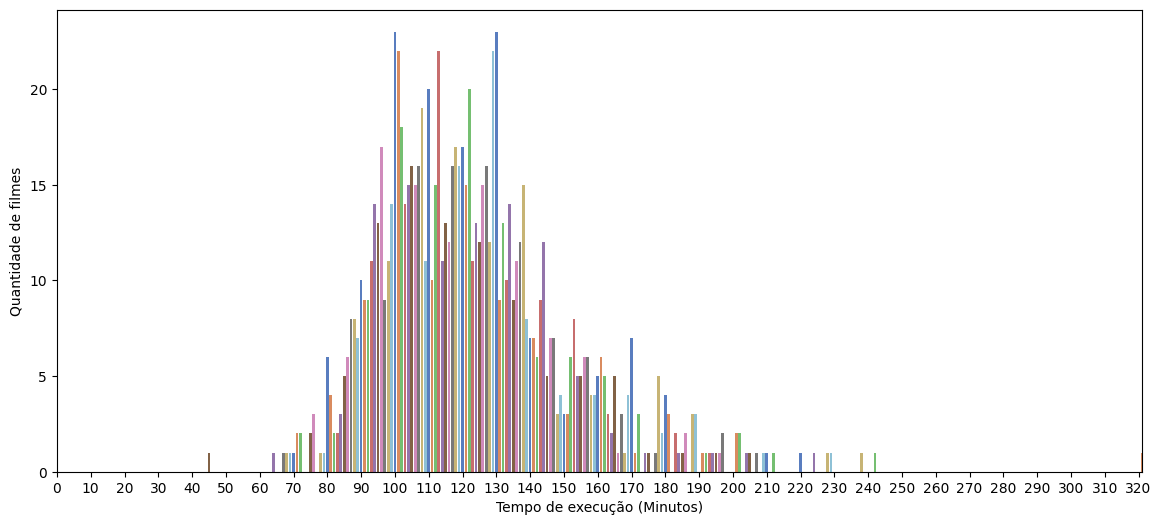

In [50]:
runtime_counts = dataframe["Runtime"].value_counts().reset_index()
runtime_counts.columns = ["Runtime", "Film Count"]
all_runtimes = pd.DataFrame({"Runtime": range(0, runtime_counts["Runtime"].max() + 1)})
full_data = pd.merge(all_runtimes, runtime_counts, on="Runtime", how="left").fillna(0)

fig2, ax2 = plt.subplots(figsize=(14, 6))
seaborn.barplot(x="Runtime", y="Film Count", hue='Runtime', data=full_data, palette="muted", ax=ax2, legend=False)

ax2.set_xlim(0, full_data["Runtime"].max())

tick_interval = 10
xticks = numpy.arange(0, full_data["Runtime"].max() + 1, tick_interval)
ax2.set_xticks(xticks)

ax2.set_xlabel("Tempo de execução (Minutos)")
ax2.set_ylabel("Quantidade de filmes")

**Gráfico**: **Média de Votos por Ano**

Text(0, 0.5, 'Média de Votos')

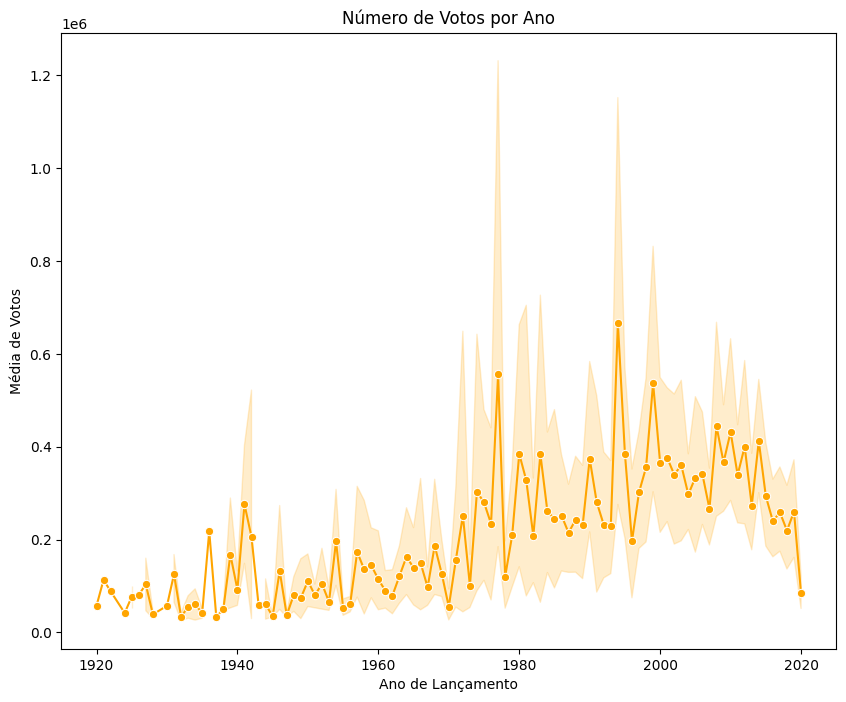

In [51]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
seaborn.lineplot(x="Released_Year", y="No_of_Votes", data=dataframe, marker="o", color="orange", ax=ax3)
ax3.set_title("Número de Votos por Ano")
ax3.set_xlabel("Ano de Lançamento")
ax3.set_ylabel("Média de Votos")